
Credit Card Fraud Detection





In [1]:
#importing libararies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

*Data Preprocessing*

In [2]:
# reading the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41432,40678.0,-0.794048,-0.341661,1.075642,-1.470494,0.315883,-0.555385,0.011309,0.160571,-1.401995,...,0.192370,0.297747,0.129615,-0.070217,-0.333227,-0.514603,0.119476,0.168145,59.95,0
225987,144466.0,2.087034,-0.809795,-1.584840,-1.048967,-0.272782,-0.939600,-0.134499,-0.308657,-0.983188,...,0.125981,0.164865,0.112347,-0.385933,-0.079995,-0.315959,-0.058631,-0.065067,73.50,0
85202,60649.0,-2.247072,-0.192231,0.747307,0.296940,-0.902658,2.162044,-0.895643,1.486559,-1.501420,...,0.064284,0.763803,-0.093503,-0.985287,-0.475036,-0.085110,0.172320,-0.160739,135.00,0
194767,130748.0,-0.191366,1.181291,-2.564358,0.542844,1.525412,1.417886,1.965147,0.125034,-0.935608,...,0.586662,2.238437,0.097212,-0.662548,-1.290730,-0.335236,0.204799,0.048884,180.00,0
103993,68876.0,-1.012588,0.361701,2.649553,0.103768,-0.062265,0.402378,0.099373,0.428361,-0.034546,...,0.147232,0.446786,-0.082150,0.215629,0.029745,-0.572655,0.125309,0.109980,35.97,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

Handling missing values

In [8]:
#checking missing values in columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data distribution analysis

In [9]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

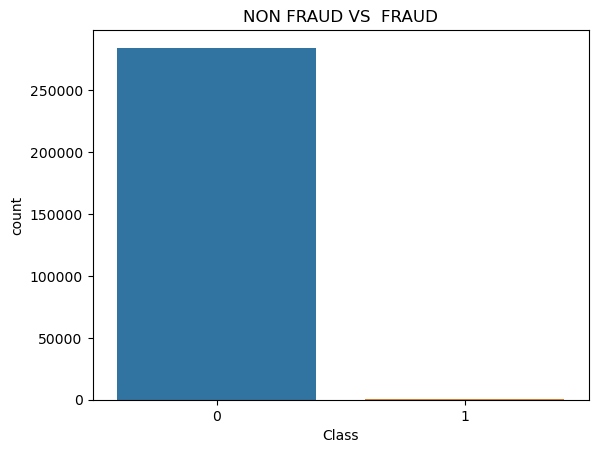

In [10]:
sns.countplot(x='Class', data=df)
plt.title('NON FRAUD VS  FRAUD')
plt.show()

Distribution of classes with time 


In [11]:
# Fraud DataFrame
fraud_df = df[df['Class'] == 1]
# Non Fraud DataFrame
non_fraud_df = df[df['Class'] == 0]

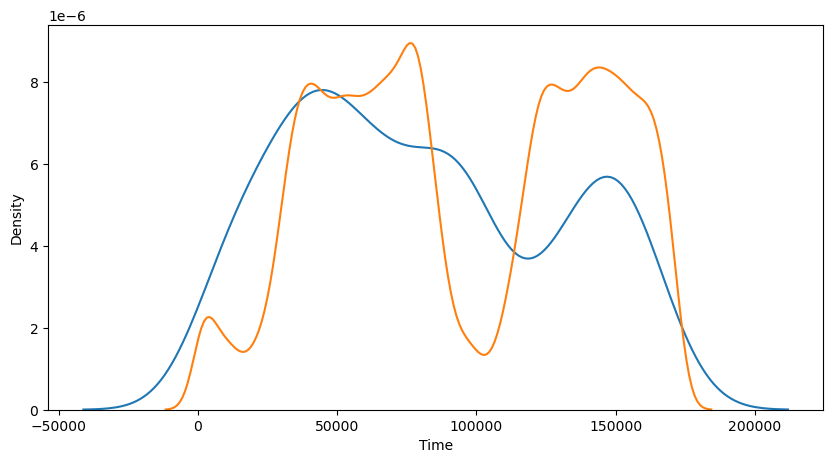

In [12]:
#distribution plot
plt.figure(figsize=(10,5))
sns.distplot(fraud_df['Time'],label ='fraud',hist= False)
sns.distplot(non_fraud_df['Time'],label = 'non_fraud' , hist = False)
plt.show()

*We do not see any specific pattern for the fraud and non fraud with respect to time . Hence we can drop the Time column.*

In [13]:
#Dropping the Time column
df.drop('Time', axis = 1 , inplace = True)

Distribution of classes with amount


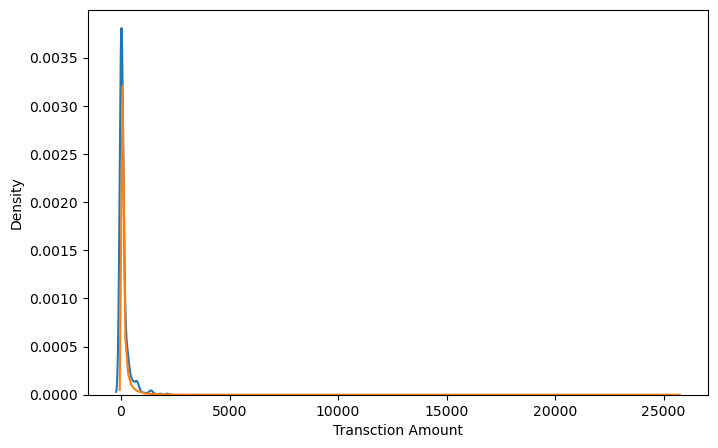

In [14]:
#Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_df['Amount'] , label = 'fraud' , hist = False)
ax = sns.distplot(non_fraud_df['Amount'] , label = 'non fraud' , hist = False)
ax.set(xlabel= 'Transction Amount')
plt.show()

***Train-Test Split***

In [15]:
#import library 
from sklearn.model_selection import train_test_split

In [16]:
#putting feature variables into x 
X = df.drop(['Class'], axis=1)

In [17]:
#putting target variable to y
y = df['Class']

In [18]:
#spliting dataset into train and test in 80:20 
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = 0.8 , random_state = 42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


**Feature Scaling**

In [20]:
# we need to scale only the amount column as all other columns are allready scaled by the PCA transformation
#standardization method
from sklearn.preprocessing import StandardScaler


In [21]:
scaler = StandardScaler()

In [22]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


In [23]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [24]:
#scaling the test set 
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


***MODELS***

In [25]:
#importing metrics
from sklearn import metrics 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay ,classification_report , f1_score

**Logistic Regression**


In [26]:
#importing libaries
from sklearn.linear_model import LogisticRegression

In [27]:
logistic = LogisticRegression()


In [28]:
logistic.fit(X_train , y_train)

LogisticRegression()

In [29]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

  

    return None
    

------------------ Confusion Matrix --------------------
[[56855     9]
 [   41    57]]


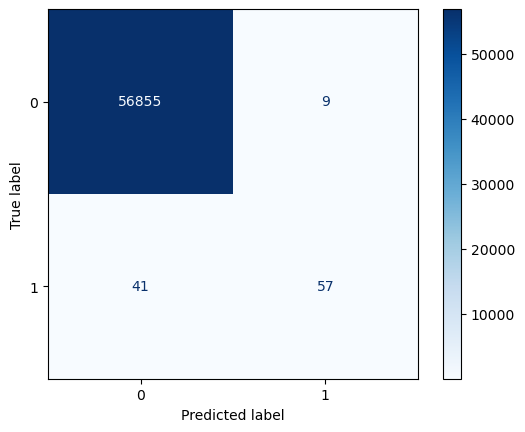

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9991222218320986
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score:- 0.6951219512195121


In [30]:
display_test_results("Logistic Regression" , logistic)

***Decision Tree***


In [31]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision = DecisionTreeClassifier()

In [33]:
decision.fit(X_train , y_train)

DecisionTreeClassifier()

In [36]:
from sklearn import tree
plt.figure(figsize = (16,10))
tree.plot_tree(model1, filled = True)
plt.show()

NameError: name 'model1' is not defined

<Figure size 1600x1000 with 0 Axes>

# display_test_results("Decision Tree" ,decision)

**Random Forest**

In [37]:
#import labaries for ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
random = RandomForestClassifier()

In [39]:
random.fit(X_train , y_train)

RandomForestClassifier()

------------------ Confusion Matrix --------------------
[[56862     2]
 [   21    77]]


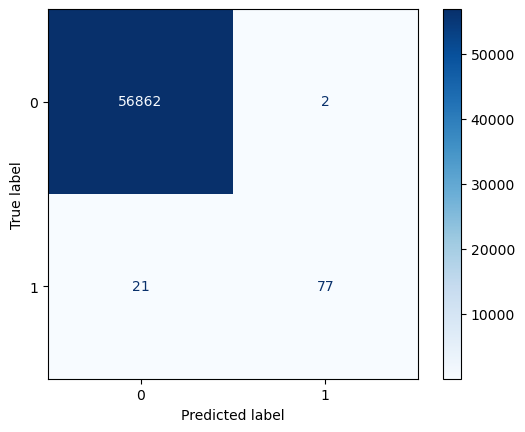

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9995962220427653
Sensitivity:- 0.7857142857142857
Specificity:- 0.9999648283624085
F1-Score:- 0.8700564971751412


In [40]:
display_test_results("Random Forest" , random)